<a href="https://colab.research.google.com/github/brandonwagstaff/lidar_feature_matching/blob/main/data/load_nuscenes_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /data/sets/nuscenes  # Make the directory to store the nuScenes dataset in.

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.
!wget https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2  # Download the nuScenes-lidarseg mini split.

!tar -xf v1.0-mini.tgz -C /data/sets/nuscenes  # Uncompress the nuScenes mini split.
!tar -xf nuScenes-lidarseg-mini-v1.0.tar.bz2 -C /data/sets/nuscenes   # Uncompress the nuScenes-lidarseg mini split.

!pip install nuscenes-devkit &> /dev/null  # Install nuScenes.

--2023-12-14 15:31:55--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 99.84.203.117, 99.84.203.41, 99.84.203.29, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|99.84.203.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G   248MB/s    in 17s     

2023-12-14 15:32:12 (240 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]

--2023-12-14 15:32:12--  https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2
Resolving www.nuscenes.org (www.nuscenes.org)... 99.84.203.117, 99.84.203.41, 99.84.203.29, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|99.84.203.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819477 (1.7M) [application/x-tar]
Saving to: ‘nuScenes-lidarseg-mini-v1.0.tar.bz2’

nuScenes-lidarseg-m 100%[===================>]   1.73M  4.71

In [26]:
%matplotlib inline

from nuscenes import NuScenes
from nuscenes.utils.data_io import load_bin_file

nusc = NuScenes(version='v1.0-mini', dataroot='/data/sets/nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.689 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
nusc.list_lidarseg_categories(sort_by='count')

Calculating semantic point stats for nuScenes-lidarseg...
  1  animal                                   nbr_points=           0
  7  human.pedestrian.stroller                nbr_points=           0
  8  human.pedestrian.wheelchair              nbr_points=           0
 19  vehicle.emergency.ambulance              nbr_points=           0
 20  vehicle.emergency.police                 nbr_points=           0
 10  movable_object.debris                    nbr_points=          48
  6  human.pedestrian.police_officer          nbr_points=          64
  3  human.pedestrian.child                   nbr_points=         230
  4  human.pedestrian.construction_worker     nbr_points=       1,412
 14  vehicle.bicycle                          nbr_points=       1,463
 11  movable_object.pushable_pullable         nbr_points=       2,293
  5  human.pedestrian.personal_mobility       nbr_points=       4,096
 13  static_object.bicycle_rack               nbr_points=       4,476
 12  movable_object.trafficcone 

In [47]:
# nusc.list_scenes()

# Get a sample from the dataset
lidar_files = []

for i in range(0, len(nusc.sample)):

  sample_token = nusc.sample[i]['token']
  sample = nusc.get('sample', sample_token)

  lidar_token = sample['data']['LIDAR_TOP']
  lidar_data = nusc.get('sample_data', lidar_token)

  annotation_tokens = sample['anns']

  lidar_filename = lidar_data['filename']

  lidar_files.append(lidar_filename)

# for ann_token in annotation_tokens:
#   ann_record = nusc.get('sample_annotation', ann_token)
#   print('sample_annotation_token: {}, category: {}'.format(ann_record['token'], ann_record['category_name']))

{'token': 'abf3d91d3c28407e80e3334fe89c03cb', 'timestamp': 1542801007446751, 'prev': '0d6668bcb0644bbaaee81c17cc308845', 'next': '', 'scene_token': 'e233467e827140efa4b42d2b4c435855', 'data': {'RADAR_FRONT': 'eaf239f22ed44bb1a097f85a5ff8da2e', 'RADAR_FRONT_LEFT': 'd68d81258f6042bba51683f00490c428', 'RADAR_FRONT_RIGHT': '4972971b75564817be10230af5d0d5b1', 'RADAR_BACK_LEFT': '6f06273d87a341029731c0db79e548bb', 'RADAR_BACK_RIGHT': '52d122035860407387effc3e39c5aa62', 'LIDAR_TOP': 'e7d9eec0e14a4a25beffd451517b520e', 'CAM_FRONT': '445dcd95cebc4c21b3e6a929fd2297bc', 'CAM_FRONT_RIGHT': '62f2f587354b4f0fa8954447394a0df4', 'CAM_BACK_RIGHT': 'f253e8760cb0441fbeade8f4e0ba7b11', 'CAM_BACK': 'ae1cee7e46fe414bb25519d6ae31c8af', 'CAM_BACK_LEFT': '8fdaff77e2de4d8ba21392e9b7d840ef', 'CAM_FRONT_LEFT': '8a87b74c6f8c46d49b73e96dd6d5f263'}, 'anns': ['1dc0b90f9c9b4af2bf2ba9a26b53c404', 'a1fb73db59474fb2bbb3f8cbf6b459c4', '7c5971da5a274146983f9c3f3ef12779', '8f237ef77e414772bb0ceb9a6ce1173c', '41f1a231ac494c5

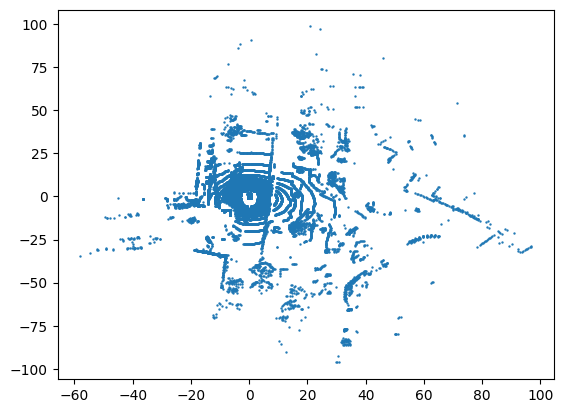

In [34]:

from nuscenes.utils.data_classes import LidarPointCloud
pc = LidarPointCloud.from_file('/data/sets/nuscenes/' + lidar_files[0])

pc.points.shape

import matplotlib.pyplot as plt

plt.scatter(pc.points[0], pc.points[1], s=0.5)
# load_bin_file('/data/sets/nuscenes/' + lidar_files[0])


[96.852745 98.59201  19.028015  0.      ]
[-57.995846  -96.290405   -3.4167116   0.       ]
(4, 34688)
6015
[40.       40.       19.028015  0.      ]
[-40.        -40.         -3.4167116   0.       ]


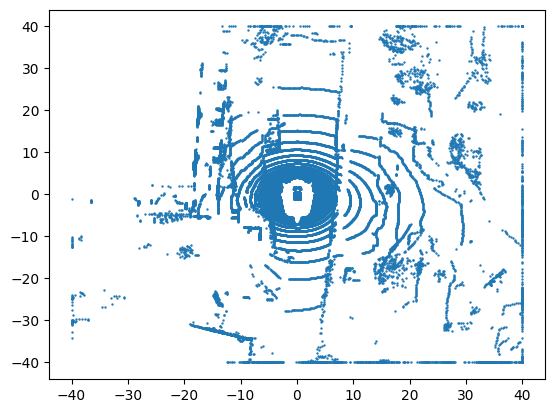

In [62]:
# prompt: crop pc.points to be within the x,y range [-40, 40] and then downsample to 1000 points
import numpy as np

test_pc = pc.points

# Normalize point cloud
test_pc[3] /= 255

print(np.max(test_pc, 1))
print(np.min(test_pc,1))
clipped_pc = test_pc.clip(-40, 40)
print(clipped_pc.shape)
print(sum(clipped_pc[2,:] > 0))
# clipped_pc = clipped_pc[:,clipped_pc[2,:] > -2]
print(np.max(clipped_pc, 1))
print(np.min(clipped_pc,1))

# clipped_pc = clipped_pc[:, np.random.choice(clipped_pc.shape[1], size=30000, replace=False)]

plt.figure()
plt.scatter(clipped_pc[0], clipped_pc[1], s=0.5)
